20
                      n      Mean  Median  Modus       SD  Min  Max
Lokasi                                                             
Gedung Griya Legita  40  3.100000     3.0      3  1.08131    1    5
Gedung Modular       11  3.545455     4.0      2  1.21356    2    5


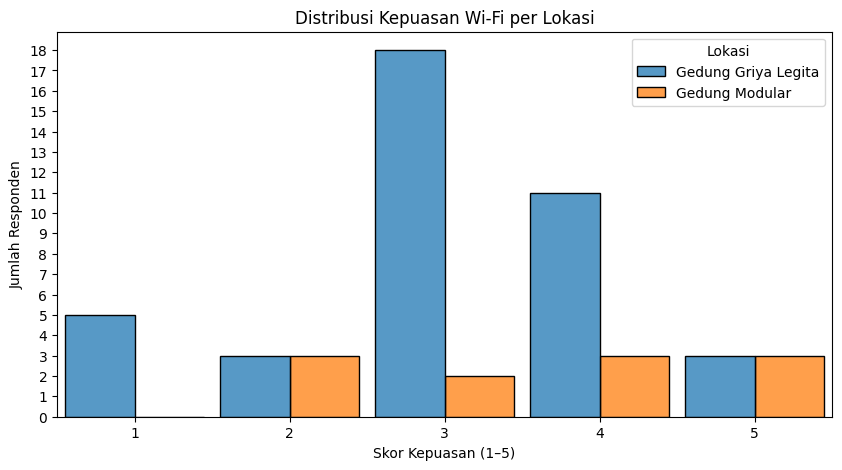

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Baca file Excel
df = pd.read_excel("data_survei.xlsx")

# 2. Rename kolom biar lebih simpel
df.columns = ["Timestamp", "Lokasi", "Frekuensi", "Kepuasan", "Gangguan", "Perbandingan", "Komentar"]

# 3. Filter hanya responden yang pilih satu lokasi (bukan 'Keduanya')
df_filtered = df[df["Lokasi"].isin(["Gedung Griya Legita", "Gedung Modular"])]
jumlah_3 = (df_filtered["Kepuasan"] == 3).sum()
print(jumlah_3)  # Output: 20


# 4. Hitung statistik deskriptif per lokasi
stats = df_filtered.groupby("Lokasi")["Kepuasan"].agg(
    n="count",
    Mean="mean",
    Median="median",
    Modus=lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    SD="std",
    Min="min",
    Max="max"
)
print(stats)

# 5. Buat histogram kepuasan per lokasi (skala 1–5)
plt.figure(figsize=(10,5))
sns.histplot(
    data=df_filtered,
    x="Kepuasan",
    hue="Lokasi",
    bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5],  # bin centered di 1–5
    multiple="dodge",
    shrink=0.9
)

plt.title("Distribusi Kepuasan Wi-Fi per Lokasi")
plt.xlabel("Skor Kepuasan (1–5)")
plt.ylabel("Jumlah Responden")
plt.xticks([1, 2, 3, 4, 5])
plt.xlim(0.5, 5.5)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])  # angka bulat
plt.show()

# 6. (Opsional) Simpan grafik ke file
# plt.savefig("histogram_wifi.png")
